In [18]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [241]:
%%R

require('tidyverse')
require('waffle')

R[write to console]: Loading required package: waffle



In [446]:
%%R

# Read data
df <- read_csv('ceo_comp_changeyoy.csv')

Rows: 84 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): company, who
dbl (2): percentagechangeyoy, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [447]:
df = pd.read_csv('ceo_comp_changeyoy.csv')

In [448]:
df

,company,who,percentagechangeyoy,year
0,Intel,Intel ceo,-0.22,2018
1,Apple,Apple ceo,0.22,2018
2,Google,Google ceo,351.75,2018
3,Zoom,Zoom ceo,NaN,2018
4,Goldman Sachs,Goldman Sachs ceo,-0.06,2018
...,...,...,...,...
79,Google,Google worker,NaN,2023
80,Zoom,Zoom worker,NaN,2023
81,Goldman Sachs,Goldman Sachs worker,NaN,2023
82,JP Morgan,JP Morgan worker,NaN,2023


In [49]:
df.dtypes

company                 object
who                     object
percentagechangeyoy    float64
year                     int64
dtype: object

In [50]:
%%R 

df

# A tibble: 84 × 4
   company        who                percentagechangeyoy  year
   <chr>          <chr>                            <dbl> <dbl>
 1 Intel          Intel ceo                        -0.22  2018
 2 Apple          Apple ceo                         0.22  2018
 3 Google         Google ceo                      352.    2018
 4 Zoom           Zoom ceo                         NA     2018
 5 Goldman Sachs  Goldman Sachs ceo                -0.06  2018
 6 JP Morgan      JP Morgan ceo                     0.06  2018
 7 Morgan Stanley Morgan Stanley ceo                0.15  2018
 8 Intel          Intel ceo                         3.01  2019
 9 Apple          Apple ceo                        -0.26  2019
10 Google         Google ceo                       -0.4   2019
# … with 74 more rows
# ℹ Use `print(n = ...)` to see more rows


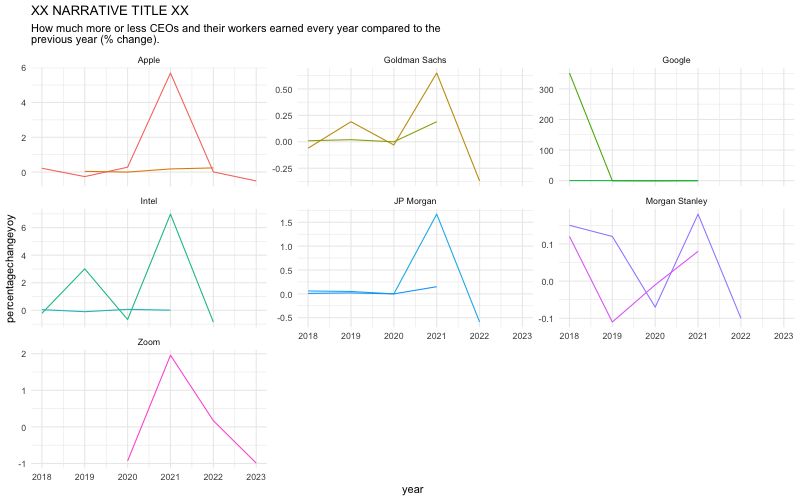

In [63]:
%%R -h 500 -w 800
ggplot(df) +
    aes(x=company, y=percentagechangeyoy, group=who, color=who) +
    facet_wrap(~company, scales='free_y') +
    geom_line() + 
    theme_minimal()+
    labs(
        title='XX NARRATIVE TITLE XX',
        subtitle="How much more or less CEOs and their workers earned every year compared to the 
previous year (% change)."
    ) + 
    theme(legend.position="none")

In [82]:
%%R

# Read data
ratio_df <- read_csv('cleaned_ceo_compensation - longformatratio.csv')

Rows: 40 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): company, note
dbl (1): year
num (1): ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [83]:
ratio_df=pd.read_csv('cleaned_ceo_compensation - longformatratio.csv')

In [84]:
ratio_df.head()

,company,ratio,year,note
0,Intel,156,2018,NaN
1,Apple,283,2018,NaN
2,Google,1906,2018,NaN
3,Zoom,NaN,2018,NaN
4,Goldman Sachs,151,2018,NaN


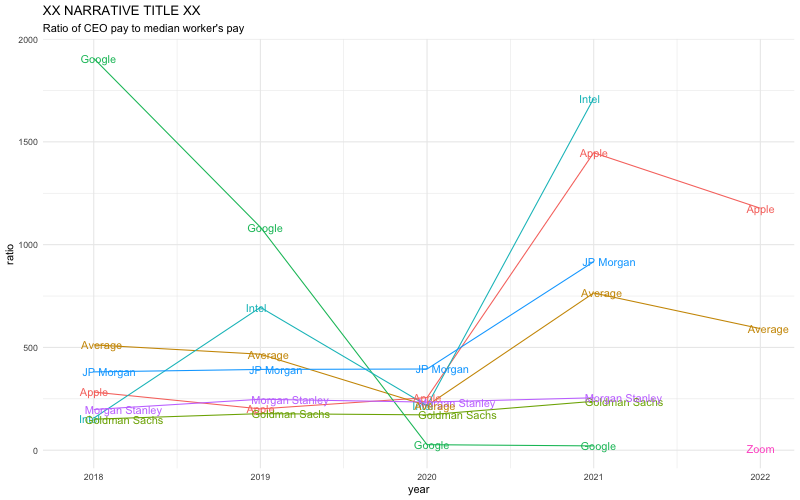

In [99]:
%%R -h 500 -w 800

average_ratio_df <- ratio_df %>% 
    filter(company=='Average')

ggplot(ratio_df) +
  aes(x = year, y = ratio, color = company) +
  geom_line() + 
  theme_minimal() +
geom_text(aes(label = company), hjust = -0.1, nudge_x = -0.1) +
  labs(
    title = 'XX NARRATIVE TITLE XX',
    subtitle = "Ratio of CEO pay to median worker's pay"
  ) + 
  theme(legend.position = "none")

In [449]:
%%R

# Read data
comp_comparison_df <- read_csv('ceo_compensation_latest_year_bubble_chart.csv')

Rows: 28 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Company, who
dbl (1): year
num (1): pay

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


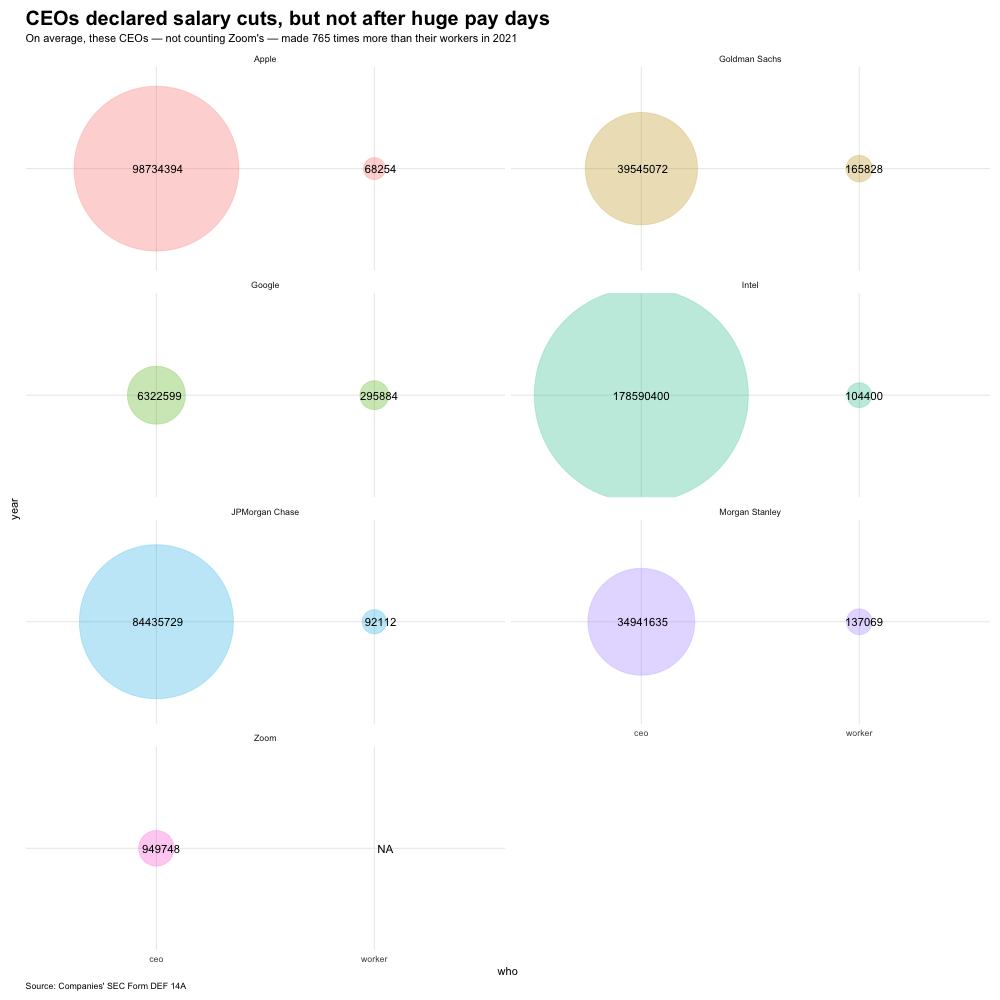

In [527]:
%%R -h 1000 -w 1000

comp_comparison_df <- comp_comparison_df %>% 
    filter(year=='2021')

ggplot(comp_comparison_df) +
  aes(x = who, y = year, size = pay, color = Company) +
  facet_wrap(~ Company, ncol=2) +
  geom_count(alpha = 0.3) +
  theme_minimal() +
  theme(
    axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
    plot.title = element_text(size = 20, face = "bold"),
    plot.margin = margin(10, 10, 10, 10),
    plot.caption = element_text(hjust = 0)
  ) +
  scale_size(range = c(10,100)) +
  scale_y_continuous(
    labels = scales::comma_format(accuracy = 1),
    breaks = seq(min(comp_comparison_df$year), max(comp_comparison_df$year), by = 2)
  ) +
  labs(
    title = 'CEOs declared salary cuts, but not after huge pay days',
    subtitle = "On average, these CEOs — not counting Zoom's — made 765 times more than their workers in 2021",
    caption = "Source: Companies' SEC Form DEF 14A"
  ) +
  theme(legend.position = "none") +
  geom_text(aes(label = label_format(pay)), color = 'black', size = 4)

In [531]:
%%R

salary_bubble_chart <- ggplot(comp_comparison_df) +
  aes(x = who, y = year, size = pay, color = Company) +
  facet_wrap(~ Company, ncol=2) +
  geom_count(alpha = 0.3) +
  theme_minimal() +
  theme(
    axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
    plot.title = element_text(size = 20, face = "bold"),
    plot.margin = margin(10, 10, 10, 10),
    plot.caption = element_text(hjust = 0)
  ) +
  scale_size(range = c(10,100)) +
  scale_y_continuous(
    labels = scales::comma_format(accuracy = 1),
    breaks = seq(min(comp_comparison_df$year), max(comp_comparison_df$year), by = 2)
  ) +
  labs(
    title = 'CEOs declared salary cuts, but not after huge pay days',
    subtitle = "On average, these CEOs — not counting Zoom's — made 765 times more than their workers in 2021",
    caption = "Source: Companies' SEC Form DEF 14A"
  ) +
  theme(legend.position = "none") +
  geom_text(aes(label = label_format(pay)), color = 'black', size = 4)

ggsave("salary_bubble_chart.png", salary_bubble_chart, dpi = 300)
ggsave("salary_bubble_chart.svg", plot = salary_bubble_chart, width = 15, height = 15)


Saving 6.67 x 6.67 in image


In [456]:
%%R

# Read data
marketcapindex_df <- read_csv('cleaned_ceo_compensation - marketcapindex.csv')

Rows: 45 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Company, percentagechange
dbl (1): year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [459]:
%%R

marketcapindex_df$percentagechange <- as.numeric(sub("%", "", marketcapindex_df$percentagechange)) *100

In [460]:
%%R

marketcapindex_df

# A tibble: 45 × 3
   Company          percentagechange  year
   <chr>                       <dbl> <dbl>
 1 Intel                       -1.89  2018
 2 Apple                      -13.3   2018
 3 Google                      -0.81  2018
 4 Zoom                        NA     2018
 5 Goldman Sachs              -36.1   2018
 6 JPMorgan Chase             -13.8   2018
 7 Morgan Stanley             -29.0   2018
 8 S&P 500                     -6.24  2018
 9 NASDAQ Composite            -3.88  2018
10 Intel                       21.2   2019
# … with 35 more rows
# ℹ Use `print(n = ...)` to see more rows


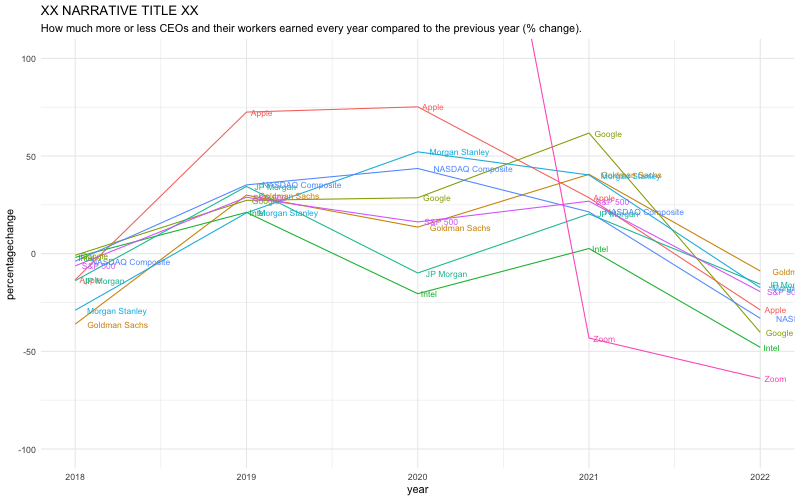

In [346]:
%%R -h 500 -w 800
highlight_companies <- c("Intel", "NASDAQ Composite", "S&P500")

ggplot(marketcapindex_df) +
    aes(x=year, y=percentagechange, color=Company) +
    geom_line() +
    scale_alpha_manual(values=ifelse(marketcapindex_df$Company %in% highlight_companies, 10,0.5)) + # highlight specific companies
    geom_text(aes(label = Company), hjust=-0.2, size=3) + # add labels for each line
    coord_cartesian(ylim=c(-100, 100)) + # zoom into only the lines where percentage change is less than 100
    theme_minimal() +
    labs(
        title='XX NARRATIVE TITLE XX',
        subtitle="How much more or less CEOs and their workers earned every year compared to the previous year (% change)."
    ) +
    theme(legend.position="none", plot.caption = element_text(hjust = 0))



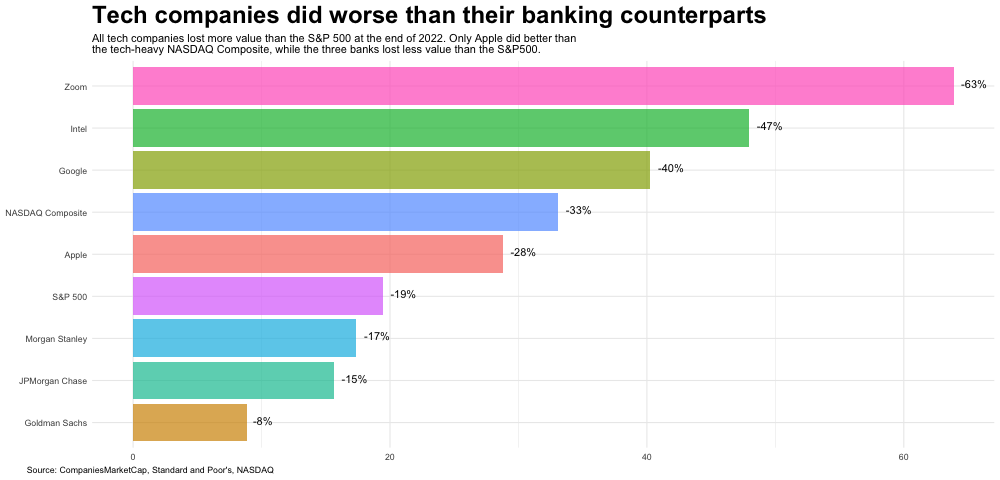

In [465]:
%%R -w 1000

# Filter the data to only include data for 2022
marketcapindex_2022 <- marketcapindex_df %>% filter(year == 2022)

# Create a bar chart with the filtered data, sorted by largest percentage change to smallest
ggplot(marketcapindex_2022, aes(x = reorder(Company, -percentagechange), y = abs(percentagechange), fill = Company)) +
  geom_bar(stat = "identity",alpha=0.7) +
geom_text(aes(label = paste0(ceiling(percentagechange),"%"), hjust = -.3, vjust = 0.2)) + # Add text labels to bars
  coord_flip() +
  theme_minimal() +
  labs(title = "Tech companies did worse than their banking counterparts",
       subtitle = "All tech companies lost more value than the S&P 500 at the end of 2022. Only Apple did better than
the tech-heavy NASDAQ Composite, while the three banks lost less value than the S&P500.",
       caption = "Source: CompaniesMarketCap, Standard and Poor's, NASDAQ ",
       x = NULL,
       y = NULL,
       fill = NULL) +
  theme(legend.position = "none",plot.title = element_text(size = 24, face = "bold"), plot.caption = element_text(hjust = -0.1))


In [469]:
%%R -w 1000

marketcap <- ggplot(marketcapindex_2022, aes(x = reorder(Company, -percentagechange), y = abs(percentagechange), fill = Company)) +
  geom_bar(stat = "identity",alpha=0.7) +
geom_text(aes(label = paste0(ceiling(percentagechange),"%"), hjust = -.3, vjust = 0.2)) + # Add text labels to bars
  coord_flip() +
  theme_minimal() +
  labs(title = "Tech companies did worse than their banking counterparts",
       subtitle = "All tech companies lost more value than the S&P 500 at the end of 2022. Only Apple did better than
the tech-heavy NASDAQ Composite, while the three banks lost less value than the S&P500.",
       caption = "Source: CompaniesMarketCap, Standard and Poor's, NASDAQ ",
       x = NULL,
       y = NULL,
       fill = NULL) +
  theme(legend.position = "none",plot.title = element_text(size = 24, face = "bold"), plot.caption = element_text(hjust = -0.1))


ggsave("marketcap.png", marketcap, dpi = 300)

Saving 13.9 x 6.67 in image


In [470]:
%%R

ggsave("marketcap.svg", plot = marketcap)


Saving 6.67 x 6.67 in image


In [471]:
%%R

# Read data
layoffs_df<- read_csv('cleaned_ceo_compensation - layoffs.csv')

Rows: 11 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Company
num (1): Layoffs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


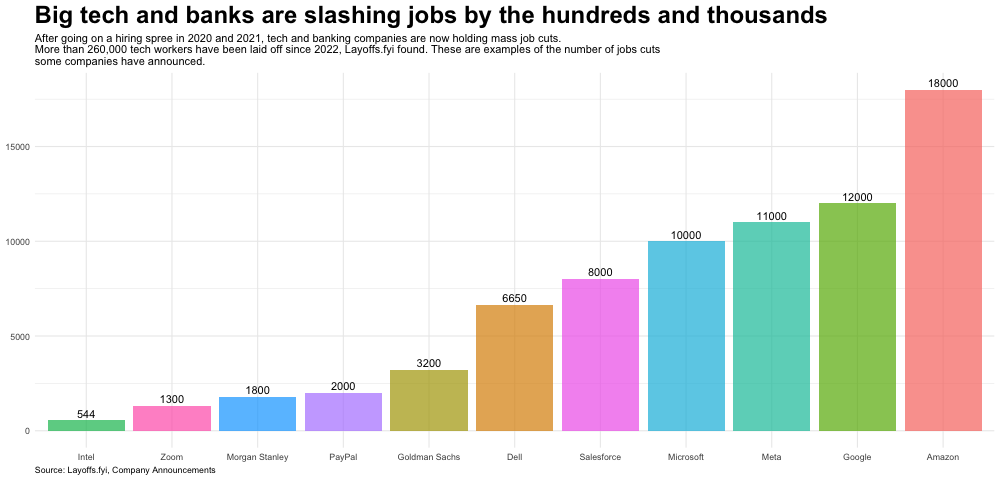

In [476]:
%%R -w 1000

ggplot(layoffs_df) +
    aes(x = Layoffs, y = reorder(Company, Layoffs), fill = Company) +
  geom_bar(stat = "identity",alpha=0.7) +
geom_text(aes(label = paste0(Layoffs), hjust = .5, vjust = -.4)) + # Add text labels to bars
  coord_flip() +
  theme_minimal() +
  labs(title = "Big tech and banks are slashing jobs by the hundreds and thousands",
       subtitle = "After going on a hiring spree in 2020 and 2021, tech and banking companies are now holding mass job cuts.
More than 260,000 tech workers have been laid off since 2022, Layoffs.fyi found. These are examples of the number of jobs cuts
some companies have announced.",
       caption = "Source: Layoffs.fyi, Company Announcements",
       x = NULL,
       y = NULL,
       fill = NULL) +
  theme(legend.position = "none",plot.title = element_text(size = 24, face = "bold"),plot.caption = element_text(hjust = 0))


In [477]:
%%R -w 1000

layoffs <- ggplot(layoffs_df) +
    aes(x = Layoffs, y = reorder(Company, Layoffs), fill = Company) +
  geom_bar(stat = "identity",alpha=0.7) +
geom_text(aes(label = paste0(Layoffs), hjust = .5, vjust = -.4)) + # Add text labels to bars
  coord_flip() +
  theme_minimal() +
  labs(title = "Big tech and banks are slashing jobs by the hundreds and thousands",
       subtitle = "After going on a hiring spree in 2020 and 2021, tech and banking companies are now holding mass job cuts.
More than 260,000 tech workers have been laid off since 2022, Layoffs.fyi found. These are examples of the number of jobs cuts
some companies have announced.",
       caption = "Source: Layoffs.fyi, Company Announcements",
       x = NULL,
       y = NULL,
       fill = NULL) +
  theme(legend.position = "none",plot.title = element_text(size = 24, face = "bold"),plot.caption = element_text(hjust = 0))

In [444]:
%%R

install.packages("svglite")

R[write to console]: Installing package into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://mirror.las.iastate.edu/CRAN/src/contrib/svglite_2.1.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 123660 bytes (120 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

clang++ -std=gnu++11 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/cpp11/include' -I'/opt/homebrew/lib/R/4.2/site-library/systemfonts/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c cpp11.cpp -o cpp11.o
clang++ -std=gnu++11 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/cpp11/include' -I'/opt/homebrew/lib/R/4.2/site-library/systemfonts/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c devSVG.cpp -o devSVG.o
clang++ -std=gnu++11 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -L/opt/homebrew/opt/gettext/lib -L/opt/homebrew/opt/readline/lib -L/opt/homebrew/opt/xz/lib

ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /opt/homebrew/lib/R/4.2/site-library/00LOCK-svglite/00new/svglite/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (svglite)
R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/private/var/folders/x2/ld74q9c55_j9mn_p0hkl_0640000gn/T/Rtmpi2Yj9B/downloaded_packages’
R[write to console]: 
R[write to console]: 



In [478]:
%%R

ggsave("layoffs_plot.svg", plot = layoffs)


Saving 6.67 x 6.67 in image


In [502]:
%%R

# Read data
shareholders_df<- read_csv('cleaned_ceo_compensation - shareholders.csv')

Rows: 8 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): company
dbl (2): pay, shareholdersagainst

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


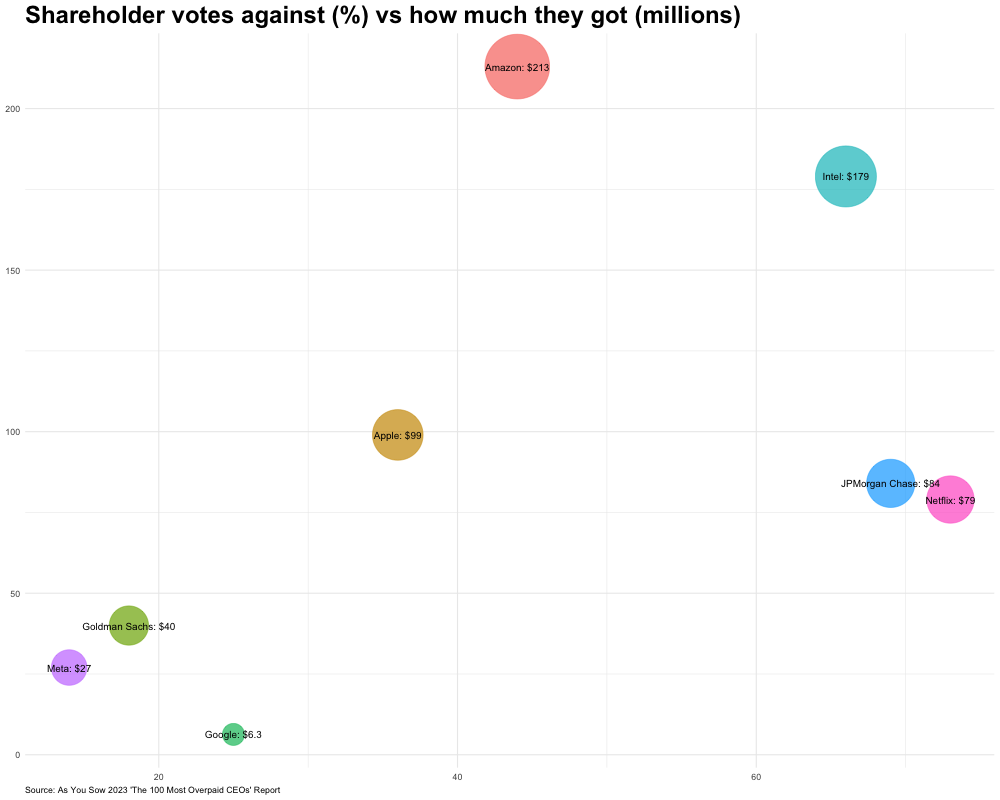

In [521]:
%%R -w 1000 -h 800

ggplot(shareholders_df) +
    aes(x = shareholdersagainst, y = pay, fill = reorder(company, -pay), size=pay, color=company) +
    geom_point(alpha = 0.7) +
    geom_text(aes(label = paste(company, pay, sep = ": $")), hjust = 0.5, color = 'black', size = 3.5) +
    theme_minimal() +
    labs(title = "Shareholder votes against (%) vs how much they got (millions)",
         caption = "Source: As You Sow 2023 'The 100 Most Overpaid CEOs' Report",
         x = NULL,
         y = NULL,
         fill = NULL) +
  scale_size(range = c(10,30)) +
    theme(legend.position = "none",
          plot.title = element_text(size = 24, face = "bold"),
          plot.caption = element_text(hjust = 0))
